In [2]:
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from torch.autograd import Variable
import torch

c:\Software\Anaconda\envs\ML\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


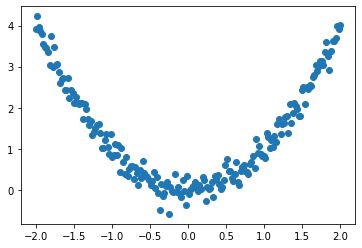

In [3]:
x_data = np.linspace(-2,2,200)[:,np.newaxis]
noise = np.random.normal(0,0.2,x_data.shape)
y_data = np.square(x_data) + noise

plt.scatter(x_data,y_data)
plt.show()

In [5]:
x_data.shape

(200, 1)

In [6]:
x_data = x_data.reshape(-1,1)
y_data = y_data.reshape(-1,1)

In [7]:
# 把numpy数据变成tensor
x_data = torch.FloatTensor(x_data)
y_data = torch.FloatTensor(y_data)
inputs = Variable(x_data)
target = Variable(y_data)

In [8]:
# 构建神经网络模型
# 一般把网络中具有可学习参数的层放在__init__()中
class LinearRegression(nn.Module):
    # 定义网络结构
    def __init__(self):
        # 初始化nn.Module
        super(LinearRegression, self).__init__()
        # 1-10-1
        self.fc1 = nn.Linear(1,10)
        self.tanh = nn.Tanh()
        self.fc2 = nn.Linear(10,1)

    # 定义网络计算
    def forward(self,x):
        x = self.fc1(x)
        x = self.tanh(x)
        x = self.fc2(x)
        return x

In [9]:
# 定义模型
model = LinearRegression()
# 定义代价函数
mse_loss = nn.MSELoss()
# 定义优化器
optimizer = optim.SGD(model.parameters(), lr=0.3)

In [10]:
for name, parameters in model.named_parameters():
    print('name:{}, param:{}'.format(name,parameters))

name:fc1.weight, param:Parameter containing:
tensor([[-0.4508],
        [ 0.7730],
        [ 0.9141],
        [-0.7638],
        [ 0.1328],
        [-0.6304],
        [ 0.1767],
        [ 0.8028],
        [-0.6139],
        [ 0.1204]], requires_grad=True)
name:fc1.bias, param:Parameter containing:
tensor([-0.0413,  0.4557,  0.6054, -0.9042, -0.9487, -0.1660,  0.0354, -0.4368,
         0.8578, -0.7781], requires_grad=True)
name:fc2.weight, param:Parameter containing:
tensor([[ 0.0796, -0.2641,  0.2893, -0.1772, -0.1050, -0.1271,  0.2989,  0.1547,
          0.0151, -0.0709]], requires_grad=True)
name:fc2.bias, param:Parameter containing:
tensor([0.1807], requires_grad=True)


In [11]:
for i in range(2001):
    out = model(inputs)
    # 计算loss
    loss = mse_loss(out, target)
    # 梯度清0
    optimizer.zero_grad()
    # 计算梯度
    loss.backward()
    # 修改权值
    optimizer.step()
    if i%200 == 0:
        print(i,loss.item())

0 2.5494401454925537
200 0.11215122044086456
400 0.05404513701796532
600 0.07789041846990585
800 0.06313139945268631
1000 0.06404134631156921
1200 0.06591252982616425
1400 0.0656299814581871
1600 0.06486207246780396
1800 0.06412304192781448
2000 0.06347236037254333


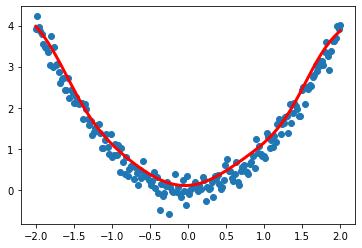

In [12]:
y_pred = model(inputs)
plt.scatter(x_data,y_data)
plt.plot(x_data,y_pred.data.numpy(),'r-',lw=3)
plt.show()